In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [2]:
sampling_rate = 10000 #in Hz 
time_length = 1 #  second
dt = 1/sampling_rate # sampling frequency
N = int(sampling_rate*time_length) # sample number

In [3]:
x0= 0 + 0j
f0= 440
f1= 420
ff= N #周波数をN回シフトさせる。n回目のシフト量は、dt*n*π*/2 これにラグがかかる
t = np.arange(0, time_length, dt)
df = np.arange(-440,440,1)

mat = np.zeros((ff,len(t)*2-1), dtype=complex) #ここに（周波数シフト、ラグ）のマトリックスを格納する

#その他配列の宣言
#que= np.zeros((len(t)), dtype=complex)
#y0 = np.zeros((len(t)), dtype=complex)
#y1 = np.zeros((len(t)), dtype=complex)
#y01 = np.zeros((len(t)), dtype=complex)
#Amp = np.zeros((ff,len(t)), dtype=float)
que= np.zeros((len(df)), dtype=complex)
y0 = np.zeros((len(df)), dtype=complex)
y1 = np.zeros((len(df)), dtype=complex)
y11 = np.zeros((len(df)), dtype=complex)
y01 = np.zeros((len(df)), dtype=complex)
Amp = np.zeros((ff,len(df)), dtype=float)
print(len(t))
#print(df)

10000


In [ ]:
#時系列だけ配列にして、Δfを一定にして図を描いてみる
ddf=0
f0=440
f1=420


#y0=np.exp(2j*np.pi*f0*t) #時系列データS1
#y1=np.exp(2j*np.pi*f1*t) #時系列データS2　周波数がS1とは異なる

y0 = np.sin(2*np.pi*f0*t)
y1=  np.sin(2*np.pi*f1*t)

y11 = y1 * np.exp(1j * (f0-f1) * np.pi * t)

#ただの相互相関、ただしy1にexp(jΔfπt)がかかっている

que0 = correlate(y0, y11, mode='full')
xx=[440,440]
yy=[-15,15]
plt.plot(que0)
#plt.plot(xx,yy)
#plt.xlim([400,460])


In [21]:
f0=440
f1=420

for ddf in range(880):
    #print(ddf)
    y0=np.exp(2j*np.pi*f0*t) #時系列データS1
    y1=np.exp(2j*np.pi*f1*t) #時系列データS2　周波数がS1とは異なる
    
    y11 = y1 * np.exp(1j * (ddf-440) * np.pi * t) #ddf-440は周波数　これも時系列データ
    
    #y01 = y0 * y1 * np.exp(2j*ddf*np.pi*t)

    que0 = correlate(y0, y11, mode='full')

    mat[ddf:] = que0[:]

#print(ddf)    

/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(470.0, 490.0)

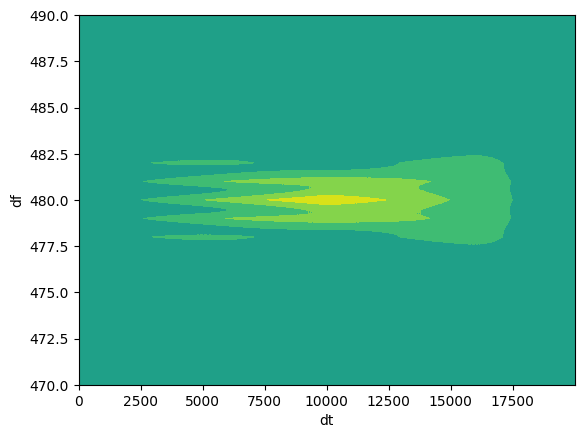

In [ ]:
plt.contourf(((mat)))
plt.xlabel("dt")
plt.ylabel("df")
plt.ylim([470,490])
#複素数でコンターってどうやって書いたんだろう！！

In [ ]:
from scipy.signal import find_peaks

peak_dt=[]
mat2 = np.zeros((20,len(t)*2-1), dtype=complex) #ここに（周波数シフト、ラグ）のマトリックスを格納する

mat2 = mat[470:490,:]

for i in range(19):
    peak,_=find_peaks(mat2[i,:])
    #print(len(peak))
    if len(peak) > 0:
        peaks = np.array(peak)
        for k in range(len(peak)):
            if mat2[i,peak[k]] > 0:
                peaks[k] = mat2[i,peak[k]]
                mpeaks=max(peaks)
    
    print(i, mpeaks,abs(mat2[i,mpeaks]))

    #peak_dt.append(peak)

#print(max(peak_dt))
#20行だけ取り出して、ピークのあった行の、最高値のｘ座標と、その時のピークの値（Abs）を求めると
#dt=　10000のところで最高値9999になっている。なので、CAFは周波数シフト40Hz、タイムシフト0秒で（サンプル数10000に対して、
#相互相関は±10000の範囲で相関を取るため。それを0から並べているため）最大になる

/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/tmp/ipykernel_1159280/1811311150.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  peaks[k] = mat2[i,peak[k]]


0 635 535.3621687152493
1 707 595.5672457038129
2 795 669.7432046935589
3 2857 0.8571429029695126
4 1060 892.8107713222621
5 1272 1071.264798206163
6 1591 1339.4861449831096
7 2121 1785.621344381524
8 3182 2678.4319614992332
9 6365 5356.8638569108
10 10000 9999.000000000004
11 6365 5356.863856910845
12 9999 3.3155606867112274e-11
13 2121 1785.6213443815313
14 9999 3.53649131097754e-11
15 1273 1071.8049284101573
16 9999 1.6998231642361715e-11
17 2857 0.8571429029633219
18 9999 1.1753958738703226e-11


In [38]:
print((mat2[10,:]))

[0.96202767+0.27295194j 1.70198896+1.05034926j 2.02599842+2.21253935j ...
 2.02599842-2.21253935j 1.70198896-1.05034926j 0.96202767-0.27295194j]
